In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('NODES1-4_CLIENTS-6_N-10_L-10_S-1200_20240625_203533.csv')

In [3]:
df

,timestamp,node_stack_messages_processed_per_sec,node_stack_messages_processed_count_per_sec,min_node_stack_messages_processed,lo_node_stack_messages_processed,avg_node_stack_messages_processed,hi_node_stack_messages_processed,max_node_stack_messages_processed,client_stack_messages_processed_per_sec,client_stack_messages_processed_count_per_sec,...,max_storage_pool_manager_tables_size,max_storage_bls_bft_readers,max_storage_bls_bft_tables_num,max_storage_bls_bft_tables_size,max_storage_seq_no_readers,max_storage_seq_no_tables_num,max_storage_seq_no_tables_size,max_storage_metrics_readers,max_storage_metrics_tables_num,max_storage_metrics_tables_size
0,2024-06-25 19:18:00,0.550000,47.516667,0.0,0.011246,0.011575,0.181507,6.0,0.000000,47.516667,...,0,0,0,720.0,0.0,0,720.0,0,0,28840.0
1,2024-06-25 19:19:00,4.850000,95.933333,0.0,0.049738,0.050556,0.971743,57.0,2.950000,95.933333,...,0,0,0,720.0,0.0,0,720.0,0,0,139232.0
2,2024-06-25 19:20:00,408.533333,29.966667,0.0,12.393680,13.632925,103.294611,1000.0,131.433333,29.966667,...,0,0,0,12752.0,0.0,0,1096968.0,0,0,294664.0
3,2024-06-25 19:21:00,414.700000,8.666667,0.0,38.117400,47.850000,241.515527,1000.0,137.400000,8.666667,...,0,0,0,18184.0,0.0,0,3152656.0,0,0,424440.0
4,2024-06-25 19:22:00,336.183333,6.416667,0.0,41.300292,52.392208,253.009555,1000.0,111.383333,6.416667,...,0,0,0,22560.0,0.0,0,4832536.0,0,0,527888.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2024-06-25 20:31:00,0.000000,94.533333,0.0,0.000000,0.000000,0.000000,0.0,0.000000,94.533333,...,0,0,0,317352.0,398072.0,0,55162760.0,0,0,8715056.0
74,2024-06-25 20:32:00,0.000000,94.516667,0.0,0.000000,0.000000,0.000000,0.0,0.000000,94.516667,...,0,0,0,317352.0,398072.0,0,55162760.0,0,0,8825608.0
75,2024-06-25 20:33:00,0.000000,94.550000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,94.550000,...,0,0,0,317352.0,398072.0,0,55162760.0,0,0,8936304.0
76,2024-06-25 20:34:00,0.100000,94.566667,0.0,0.001040,0.001057,0.050706,3.0,0.000000,94.566667,...,0,0,0,317896.0,398072.0,0,55162760.0,0,0,9050016.0


In [4]:
melted_df = pd.melt(df.loc[:, ['timestamp', 'avg_monitor_avg_latency', 'avg_backup_monitor_avg_latency']], 'timestamp')
melted_df.loc[melted_df['variable'] == 'avg_monitor_avg_latency', 'variable'] = 'Avg. Monitor Avg. Latency'
melted_df.loc[melted_df['variable'] == 'avg_backup_monitor_avg_latency', 'variable'] = 'Avg. Backup Monitor Avg. Latency'

In [5]:
melted_df

,timestamp,variable,value
0,2024-06-25 19:18:00,Avg. Monitor Avg. Latency,0.000000
1,2024-06-25 19:19:00,Avg. Monitor Avg. Latency,1.685901
2,2024-06-25 19:20:00,Avg. Monitor Avg. Latency,7.080478
3,2024-06-25 19:21:00,Avg. Monitor Avg. Latency,11.025027
4,2024-06-25 19:22:00,Avg. Monitor Avg. Latency,11.241216
...,...,...,...
151,2024-06-25 20:31:00,Avg. Backup Monitor Avg. Latency,0.000000
152,2024-06-25 20:32:00,Avg. Backup Monitor Avg. Latency,0.000000
153,2024-06-25 20:33:00,Avg. Backup Monitor Avg. Latency,0.000000
154,2024-06-25 20:34:00,Avg. Backup Monitor Avg. Latency,0.000000


/tmp/ipykernel_65945/2739528546.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = plot.set_xticklabels(plot.get_xticklabels(), rotation=60)


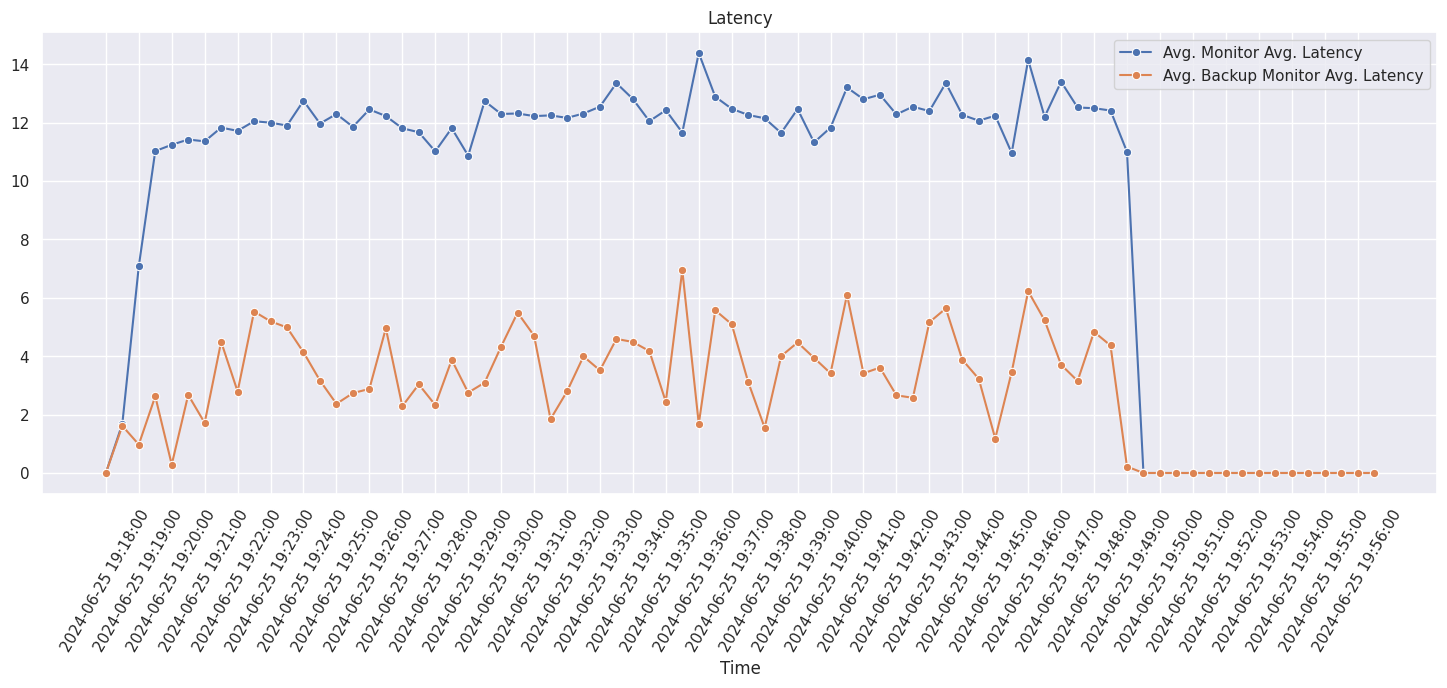

In [6]:
sns.set_theme(rc={'figure.figsize':(18, 6)})
plot = sns.lineplot(data=melted_df, x='timestamp', y='value', hue='variable', legend=True, marker="o")
_ = plot.legend(title='')
_ = plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
_ = plot.set(xlabel='Time', ylabel='')
_ = plot.set_xticks(plot.get_xticks()[::2])
_ = plot.set_title('Latency')

In [7]:
melted_df = pd.melt(df.loc[:, ['timestamp', 'client_stack_messages_processed_per_sec', 'ordered_batch_size_per_sec']], 'timestamp')
melted_df.loc[melted_df['variable'] == 'client_stack_messages_processed_per_sec', 'variable'] = 'Client stack messages processed per sec'
melted_df.loc[melted_df['variable'] == 'ordered_batch_size_per_sec', 'variable'] = 'Ordered batch size per sec'
melted_df

,timestamp,variable,value
0,2024-06-25 19:18:00,Client stack messages processed per sec,0.000000
1,2024-06-25 19:19:00,Client stack messages processed per sec,2.950000
2,2024-06-25 19:20:00,Client stack messages processed per sec,131.433333
3,2024-06-25 19:21:00,Client stack messages processed per sec,137.400000
4,2024-06-25 19:22:00,Client stack messages processed per sec,111.383333
...,...,...,...
151,2024-06-25 20:31:00,Ordered batch size per sec,0.000000
152,2024-06-25 20:32:00,Ordered batch size per sec,0.000000
153,2024-06-25 20:33:00,Ordered batch size per sec,0.000000
154,2024-06-25 20:34:00,Ordered batch size per sec,0.000000


/tmp/ipykernel_65945/1023630775.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = plot.set_xticklabels(plot.get_xticklabels(), rotation=60)


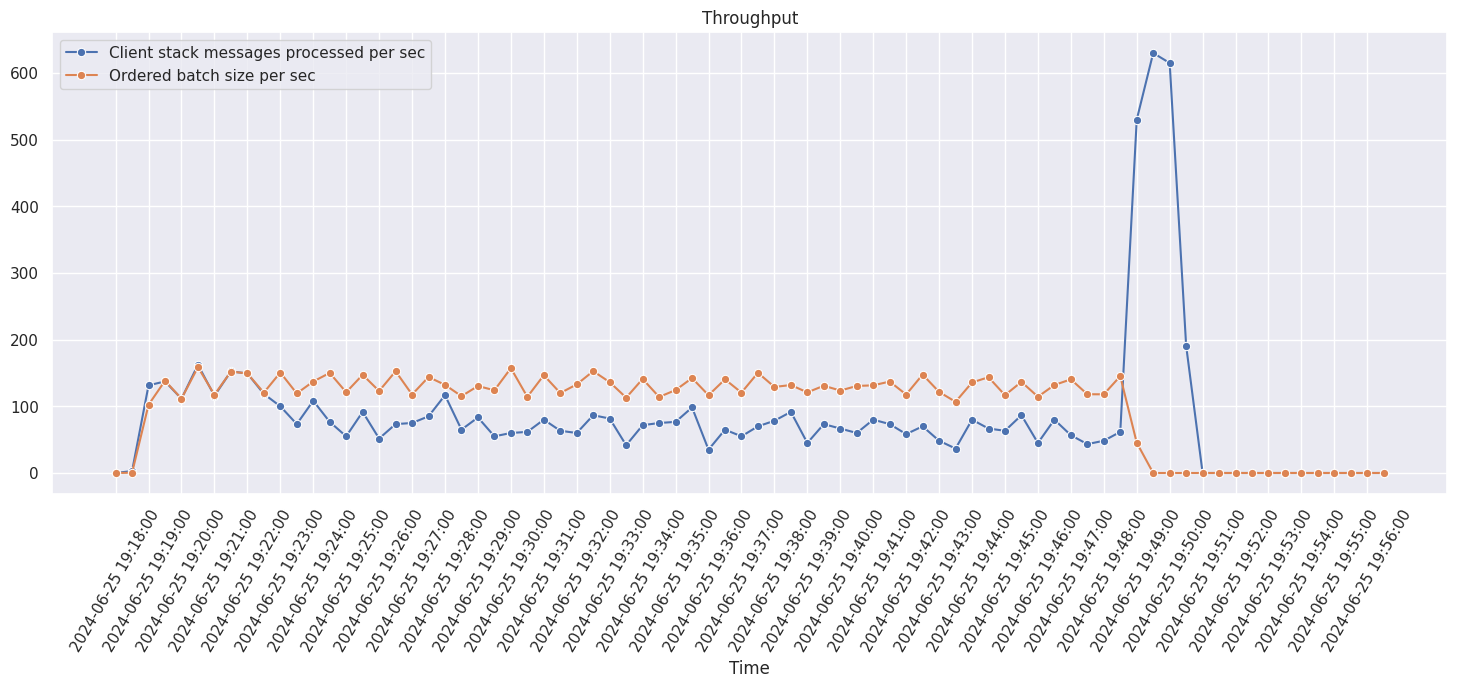

In [8]:
sns.set_theme(rc={'figure.figsize':(18, 6)})
plot = sns.lineplot(data=melted_df, x='timestamp', y='value', hue='variable', legend=True, marker="o")
_ = plot.legend(title='')
_ = plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
_ = plot.set(xlabel='Time', ylabel='')
_ = plot.set_xticks(plot.get_xticks()[::2])
_ = plot.set_title('Throughput')